In [1]:
import tensorflow as ts
import os
import matplotlib.pyplot as plt


In [2]:
import os
import cv2
import numpy as np

# Define the path to the folder containing subfolders with images
data_dir = "./data/PokemonData/"

# Create lists to store images and labels
images = []
labels = []

# Iterate through subfolders
for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    
    # Skip non-directory entries
    if not os.path.isdir(label_path):
        continue
    
    # Assign a unique integer label to each subfolder
    class_label = len(labels)
    
    # Iterate through image files in the subfolder
    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)
        
        # Attempt to read the image
        image = cv2.imread(image_path)
        
        if image is not None:
            # Resize the image to a common size (e.g., 224x224)
            image = cv2.resize(image, (224, 224))
            
            # Normalize pixel values (0-255) to the range (0-1)
            image = image / 255.0
            
            images.append(image)
            labels.append(label)
        else:
            print(f"Failed to read image: {image_path}")

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)



Failed to read image: ./data/PokemonData/Cloyster\ff270ebfab0f46b3b05c3fecd6a15ef9.svg
Failed to read image: ./data/PokemonData/Dewgong\e3ecbb47e192470aa8686734b7813b43.svg
Failed to read image: ./data/PokemonData/Exeggutor\2b8bc491c5ca4e788999f8ea53617638.svg
Failed to read image: ./data/PokemonData/Exeggutor\f29b4f9fccff4055b167ece6556143cd.svg
Failed to read image: ./data/PokemonData/Golduck\bc08a691e7cb41b0bec2adf931dc9634.svg
Failed to read image: ./data/PokemonData/Graveler\3fe3c6a0bbd14de89092d2c675f743c1.svg
Failed to read image: ./data/PokemonData/Magneton\45e434d002bd44eeb1acbc2decc8ee0f.svg
Failed to read image: ./data/PokemonData/Omastar\1be6e7da1bba4379b298b20013c57b4b.svg
Failed to read image: ./data/PokemonData/Scyther\a8734f10941a4deb95fcf7388e4fe8e2.svg
Failed to read image: ./data/PokemonData/Tentacruel\d6fb0a3046364ea2b49525c6f6b966e5.svg
Failed to read image: ./data/PokemonData/Venomoth\bb5d47bced6e4e33a77faa17e1eec906.svg
Failed to read image: ./data/PokemonData/Za

In [3]:
labels[:23]

array(['Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra',
       'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra',
       'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra', 'Abra'],
      dtype='<U16')

In [4]:
# image_index = 4556  # Change this to the index of the image you want to view

# Display the image and its label
def showImage(image_index):
    plt.imshow(images[image_index])
    plt.title(f"Label: {labels[image_index]}")
    plt.show()



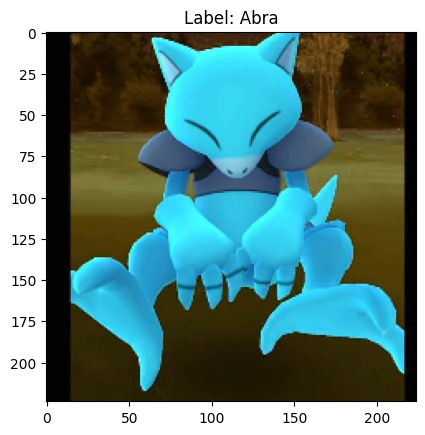

In [5]:
showImage(3)

In [6]:
# pip install scikit-learn


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)


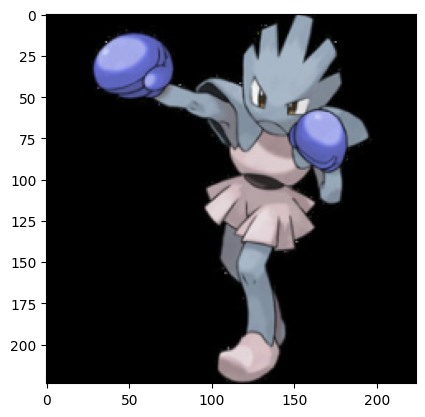

In [8]:
# train_images[0].shape
plt.imshow(train_images[0])


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your CNN model
model = keras.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(150, activation='softmax')  # Adjust num_classes based on your problem
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using your training data
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node Cast_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "C:\Users\njaya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\njaya\AppData\Local\Temp\ipykernel_13584\587835482.py", line 25, in <module>

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1131, in train_step

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1225, in compute_metrics

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn

  File "c:\Users\njaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 708, in update_state

Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_1240]

In [ ]:
import cv2
import numpy as np

# Load the new image (make sure it's preprocessed similarly to your training data)
new_image = cv2.imread("path_to_new_image.jpg")
new_image = cv2.resize(new_image, (224, 224))
new_image = new_image / 255.0
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Use your trained model to make a prediction
predictions = model.predict(new_image)

# If you're doing classification, you can get the class label with the highest probability
predicted_class = np.argmax(predictions)

# You can also get the class label names if you have a mapping
class_names = ["class1", "class2", "class3"]  # Replace with your class labels
predicted_class_name = class_names[predicted_class]

print(f"Predicted class: {predicted_class_name}")
print(f"Predicted class: {predicted_class}")
